In [1]:
%run ~/Projects/Jupyter-Mods/ruaridhs-notebook-initialiser.ipy
%run ~/Projects/Jupyter-Mods/ruaridhs-notebook-prettifier.ipy

imported pandas as pd | imported numpy as np | imported matplotlib.pyplot as plt and changed visual style to "ggplot" | set matplotlib plots to display inline at retina resolution | imported nitpick.plots as nplt | imported bokeh .charts .plotting and .models as bkc, bkp, bkm | 

Loading BokehJS ...

"improved" the css | hidding the header and toolbar

### Initialisation

In [3]:
# make this compatible with python2 and python3
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [4]:
# import matplotlib to be able to plot things
import matplotlib.pyplot as plt
# make the plots appear in jupyter notebook
%matplotlib inline
# make the plots high resolution
%config InlineBackend.figure_format='retina' 

# 1) Get The Data

The tensorflow library has some example datasets included. This one called MNIST is of small hand written digits.

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('.', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


Look at the data to see what's there.

In [8]:
mnist.train.images.shape

(55000, 784)

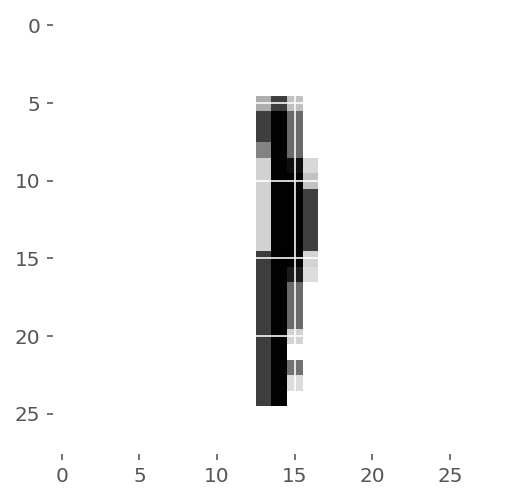

In [12]:
plt.imshow(mnist.train.images[90].reshape([28,28]),cmap='gray_r');

In [11]:
mnist.train.labels[2]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

# 2) Define The Model

In [13]:
import tensorflow as tf

### Define The Model

In [14]:
# add a placeholder to input the images and labels
input_images = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

# define the parameters of the model
W1 = tf.Variable(tf.truncated_normal([784, 64]))
b1 = tf.Variable(tf.zeros([64]))

W2 = tf.Variable(tf.truncated_normal([64, 10]))
b2 = tf.Variable(tf.zeros([10]))

# define the computation the model performs
logits1 = tf.nn.relu(tf.matmul(input_images, W1) + b1)
logits2 = tf.matmul(logits1, W2) + b2

### Define The Loss Function

In [15]:
# Define loss function
loss = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits2))

# Define the output of the model
prediction = tf.nn.softmax(logits2)

# Define the trainer
train_step = tf.train.GradientDescentOptimizer(0.9).minimize(loss)

# 3) Train The Model

### Setup The Tensorflow Session

In [16]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### Train The Model

In [18]:
loss_history = []

In [19]:
for i in range(2000):
    
    # get some of the images and their labels
    batch_images, batch_labels = mnist.train.next_batch(5500)
    
    # Perform one step of training
    _, l = sess.run([train_step, loss], feed_dict={input_images: batch_images, labels: batch_labels})
    
    # Every 100 iterations print out the value of the loss function
    if i%100 == 0:
        loss_history.append(l)
        print(l)

132.194
1.17699
0.798533
0.657436
0.569862
0.497914
0.441236
0.413106
0.39011
0.360489
0.336264
0.362535
0.317747
0.313818
0.307414
0.315019
0.304089
0.301466
0.26334
0.248717


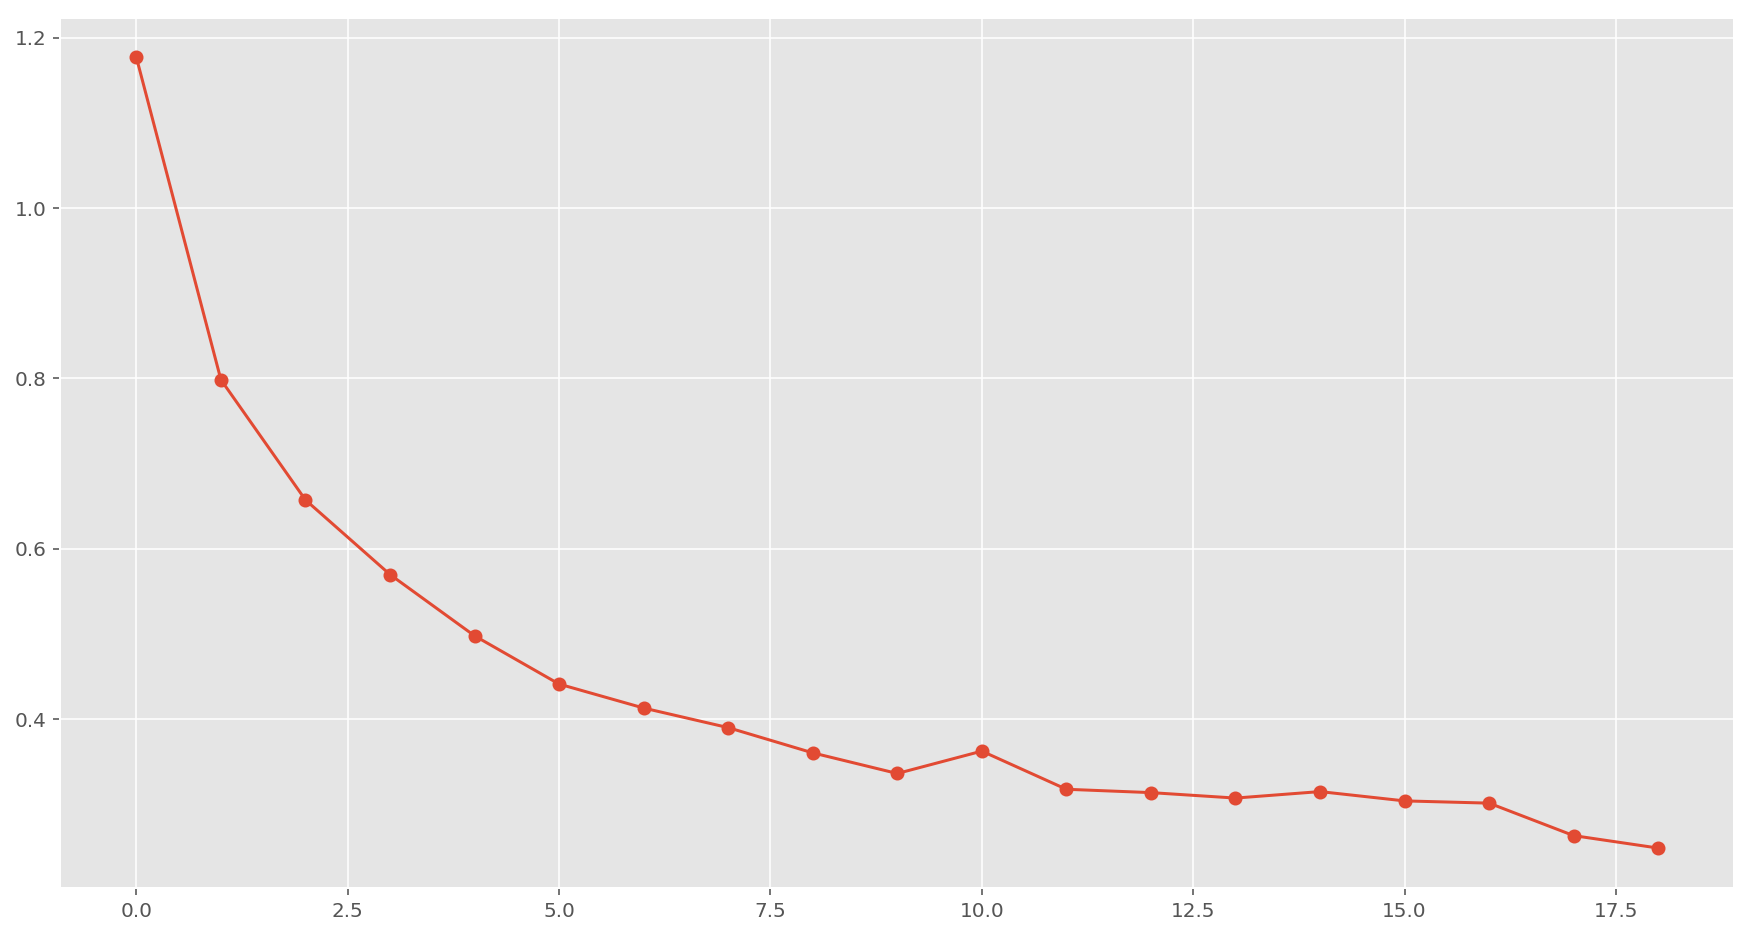

In [20]:
plt.plot(loss_history[1:], 'o-');
plt.gcf().set_size_inches([15,8])

# 4) Check Whether It Works

### Test The Trained Model

In [277]:
correct_prediction = tf.equal(tf.argmax(logits2, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={input_images: mnist.test.images,
                                      labels: mnist.test.labels}))

0.9453


# 5) Use The Model

In [26]:
def prediction_to_number(prediction):
    """ Converts the output of the model to the acual number it represents."""
    i = prediction.argmax()
    return i

In [22]:
# pick a random image
test_i = 121
img = mnist.test.images[test_i:test_i+1]

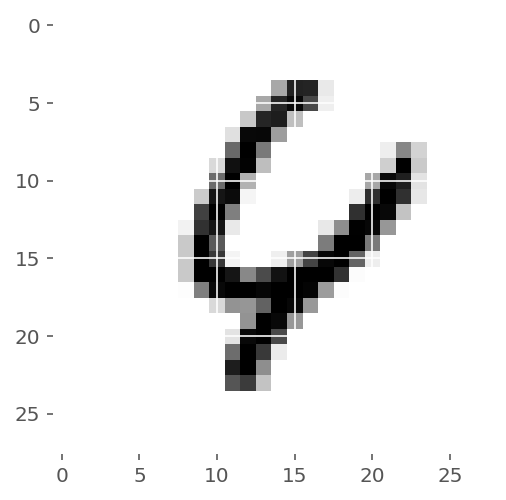

In [23]:
# display the image
plt.imshow(img.reshape([28,28]),cmap='gray_r');

In [24]:
# predict what number this image represents
p = sess.run(prediction, feed_dict={input_images: img, labels: mnist.test.labels[0:1]})
print(p)

[[  6.66350068e-04   1.02502722e-02   1.97294285e-03   3.17253056e-03
    6.97642326e-01   3.93664464e-03   1.43512413e-02   1.85987912e-02
    4.28182296e-02   2.06590727e-01]]


In [27]:
# convert the ouput to the actual number
prediction_to_number(p)

4

# Try real input

 - read from camera / folder into numpy array
 - crop to square
 - resize to 28*28
 - run prediction